In [6]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import pandas as pd

# reading CSV file
data = pd.read_csv("assam_tibet.csv")
  
# converting column data to list
lats = data['LAT'].tolist()
lons = data['LON'].tolist()

hypolat = data['LATH'].tolist()
hypolon = data['LONH'].tolist()


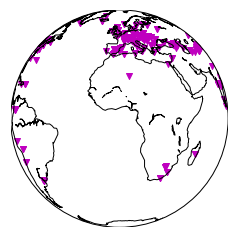

In [7]:
map = Basemap(projection='ortho', 
              lat_0=0, lon_0=0)

#map.drawmapboundary(fill_color='aqua')
#map.fillcontinents(color='coral',lake_color='aqua')
map.drawcoastlines()

x, y = map(lons, lats)

map.scatter(x, y, marker='v',color='m')

plt.show()

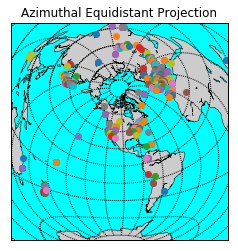

In [8]:
from mpl_toolkits.basemap import Basemap
import numpy as np
import matplotlib.pyplot as plt

width = 28000000; lon_0 = -105; lat_0 = 40
m = Basemap(width=width,height=width,projection='aeqd',
            lat_0=lat_0,lon_0=lon_0)

# fill background.
m.drawmapboundary(fill_color='aqua')
# draw coasts and fill continents.
m.drawcoastlines(linewidth=0.5)
m.fillcontinents(lake_color='aqua')

# 20 degree graticule.
m.drawparallels(np.arange(-80,81,20))

m.drawmeridians(np.arange(-180,180,20))
# draw a black dot at the center.
xpt, ypt = m(lons, lats)

m.plot([xpt],[ypt],'o')


# draw the title.
plt.title('Azimuthal Equidistant Projection')
plt.show()

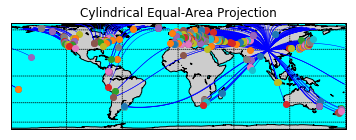

In [9]:
from mpl_toolkits.basemap import Basemap
import numpy as np
import matplotlib.pyplot as plt

m = Basemap(projection='cea',llcrnrlat=-90,urcrnrlat=90,\
            llcrnrlon=-180,urcrnrlon=180,resolution='c')
m.drawcoastlines()
m.fillcontinents(lake_color='aqua')
# draw parallels and meridians.
m.drawparallels(np.arange(-90.,91.,30.))
m.drawmeridians(np.arange(-180.,181.,60.))
m.drawmapboundary(fill_color='aqua')

xpt, ypt = m(lons, lats)

i = 0
max = len(lons)
while (i < max):
    m.drawgreatcircle(hypolon[i], hypolat[i], lons[i] , lats[i] ,linewidth=0.5,color='b')
    i= i +1

m.plot([xpt],[ypt],'o')

plt.title("Cylindrical Equal-Area Projection")
plt.show()

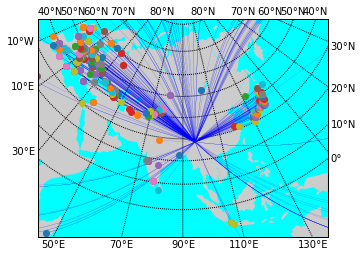

In [11]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import numpy as np



# setup Lambert Conformal basemap.
m = Basemap(width=12000000,height=9000000,projection='lcc',
            resolution='c',lat_1=0.,lat_2=75,lat_0=35,lon_0= 90.)

# draw a boundary around the map, fill the background.
# this background will end up being the ocean color, since
# the continents will be drawn on top.

m.drawmapboundary(fill_color='aqua')
# fill continents, set lake color same as ocean color.
m.fillcontinents(lake_color='aqua')
# draw parallels and meridians.
# label parallels on right and top
# meridians on bottom and left
parallels = np.arange(0.,81,10.)
# labels = [left,right,top,bottom]

m.drawparallels(parallels,labels=[False,True,True,False])
meridians = np.arange(10.,351.,20.)
m.drawmeridians(meridians,labels=[True,False,False,True])

# draw great circle route 
i = 0
max = len(lons)
while (i < max):
    m.drawgreatcircle(hypolon[i], hypolat[i], lons[i] , lats[i] ,linewidth=0.1,color='b')
    i= i +1

xpt,ypt = m(lons,lats)
m.plot([xpt],[ypt],'o')
plt.show()